# Predicting IBM Employee Attrition using Machine Learning

This paper focuses on building a classification model to predict employee attrition by considering factors such as distance from home to workplace, marital status, monthly income, etc.

It is essential to identify these factors because employee attrition leads to significant consequences, that are confronted by organizations, e.g.:

*   Decreased productivity;
*   Loss of skilled employees;
*   Loss of time and resources for training new employees;
*   To sum up, reduced profits.

The model contributes to taking proactive measures to supress employee attrition.

The findings of the paper can be useful for HR professionals, managers, and executives responsible for managing human resources in their organizations.

Original dataset consists of fictional data and provided by IBM on [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

The paper done during the machine learning course at HSE University, 2023.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

## Data Overview

First examine the data to better understand how to work with it throughout the paper.

Inspect next questions:

*   How many observations and variables in the dataset?
*   How many missing values?
*   What types of data are we dealing with?
*   What is the output variable and how to interpret it?
*   How balanced is the dataset?




In [70]:
data = pd.read_csv("./input/ibm.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The dataset includes **1470 observations** and **35 variables**:

In [71]:
data.shape

(1470, 35)

**No missing values**:

In [72]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are **only categorical and integer** data types:

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Attrition is the target variable** indicating that an employee has left a job.

Finally, the dataset is highly **imbalanced**:

In [74]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Data Analysis

Study carefully the dataset to find patterns, detect outliers, and interpret variables.

Look into the data deeper:

In [75]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Look at categorical variables:

In [76]:
for column in data.columns:
  if data[column].dtype == object:
    if column == "Attrition":
      continue

    print(column)
    print(data[column].value_counts())
    print("====================================")

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Over18
Y    1470
Name: Over18, dtype: int64
OverTime
No

Interpret some numerical features according to the dataset source.

Education (US stages):
 * 1 - Below College;
 * 2 - College;
 * 3 - Bachelor;
 * 4 - Master;
 * 5 - Doctor.

Environment Satisfaction, Job Involvement, Job Satisfaction, Relationship Satisfaction:
 * 1 - Low;
 * 2 - Medium;
 * 3 - High;
 * 4 - Very High.

Job Level:
 * 1 - Staff;
 * 2 - Senior Staff;
 * 3 - First Level Management;
 * 4 - Middle Management;
 * 5 - Senior management.

Performance Rating:
 * 1 - Low;
 * 2 - Good;
 * 3 - Excellent;
 * 4 - Outstanding.

Work-Life Balance:
 * 1 - Bad;
 * 2 - Good;
 * 3 - Better;
 * 4 - Best.

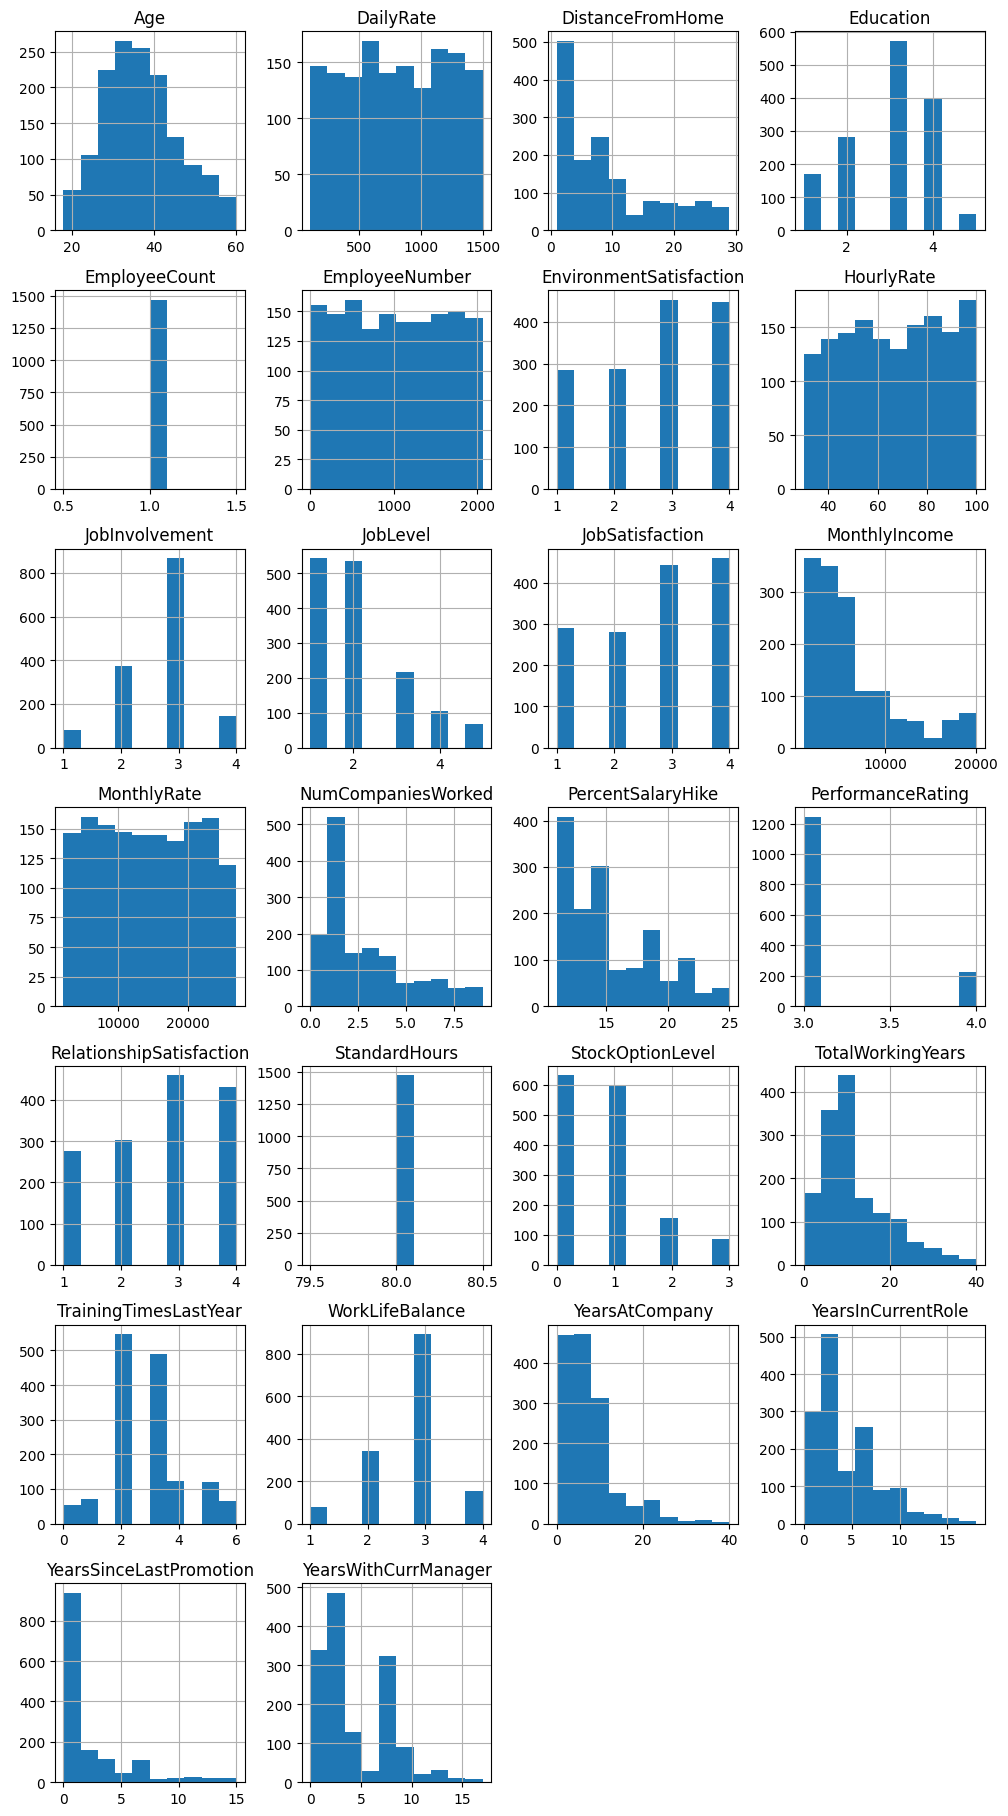

In [77]:
data.drop("Attrition", axis=1).hist(figsize=(12,100), layout=(30,4))

plt.show()

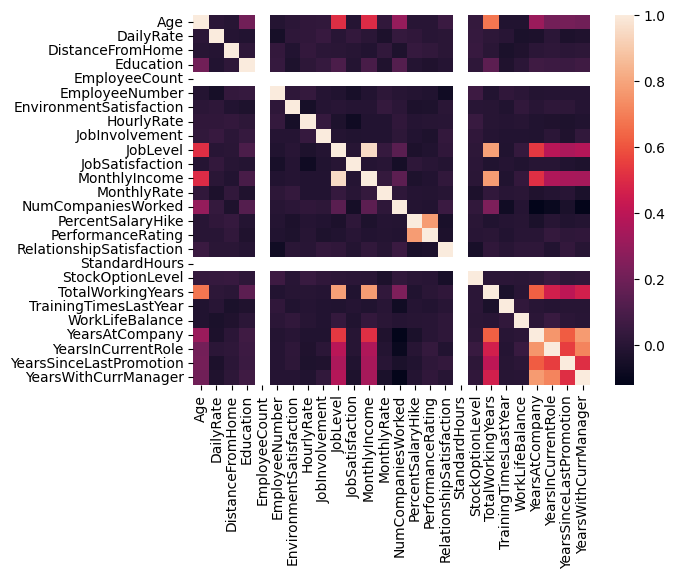

In [78]:
corr = data.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

plt.show()

## Data Preprocessing

Process the data before building the model.

First of all, count unique values:

In [79]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

"EmployeeCount", "Over18", "StandardHours" have only one unique values; "EmployeeNumber" has 1470 ones. So this features are useless and should be dropped:

In [80]:
data.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis="columns", inplace=True)

Transform categorical data into dummies:

In [81]:
label = LabelEncoder()
data["Attrition"] = label.fit_transform(data.Attrition)

dummy_columns = [column for column in data.drop("Attrition", axis=1).columns if data[column].dtypes == object]
data = pd.get_dummies(data, columns=dummy_columns, drop_first=True, dtype="uint8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

Identify some significant correlations:

<Axes: >

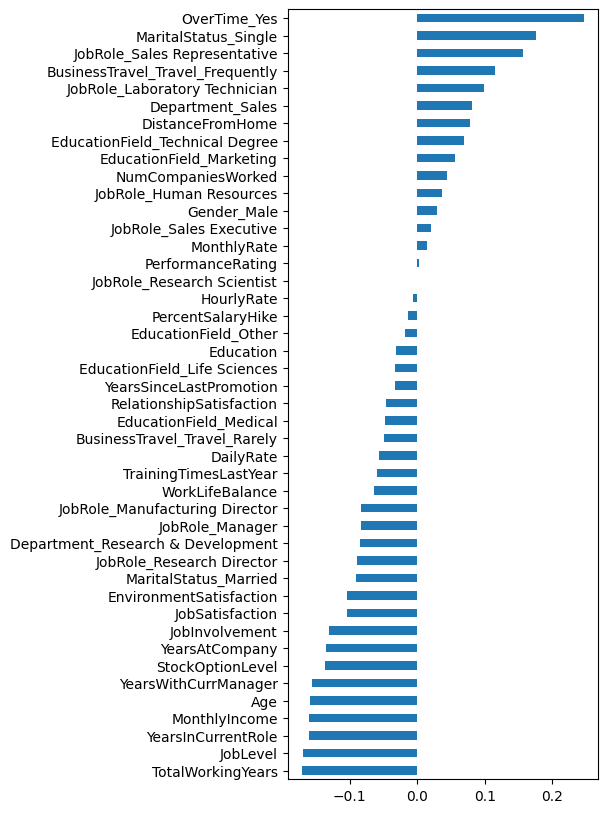

In [82]:
data.drop("Attrition", axis=1).corrwith(data.Attrition).sort_values().plot(kind="barh", figsize=(4, 10))

As shown above, the most considerable factors leading to employee attrition include:

* Overtime work;
* Single marital status;
* Work at the sales department;
* Frequent business travels;
* Long distance from home to workplace.

*To be continued...*